<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">

برای اجرای این نوت‌بوک نیاز به نصب کتابخانه کراس (Keras) دارید. برای نصب این کتابخانه میتوانید لینک زیر را مطالعه کنید.
</div>

[http://blog.class.vision/1396/12/installing-keras-with-tensorflow-backend/](http://blog.class.vision/1396/12/installing-keras-with-tensorflow-backend/)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در صورتی که تمام کتابخانه‌های مورد نیاز شما نصب باشد سلول زیر باید بدون مشکل اجرا شود.

</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
workbookDir = os.getcwd()
path = "/drive/My Drive/Colab Notebooks/DeepAkhavanFiles"
print('workbookDir: ' + workbookDir + path)
os.chdir(workbookDir + path)  # If you changed the current working dir, this will take you back to the workbook dir.
print('workbookDir: ' ,os.getcwd())

workbookDir: /content/drive/My Drive/Colab Notebooks/DeepAkhavanFiles
workbookDir:  /content/drive/My Drive/Colab Notebooks/DeepAkhavanFiles


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np

from dataset import load_hoda

<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای اینکه موقع اجرای کدها دقیقا نتایج سر کلاس را بتوانید مشاهده کنید
:
</div>

In [ ]:
np.random.seed(123)  # for reproducibility

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [ ]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()


In [ ]:
np.shape(x_train_original)  #make numpy and then shape

(1000, 25)

In [ ]:
np.shape(y_train_original)

(1000,)

In [ ]:
np.shape(y_test_original)

(200,)

In [ ]:
np.shape(x_test_original)

(200, 25)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> پیش‌پردازش داده‌ها برای Keras</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تبدیل
x_train و x_test
به فرمت آرایه‌های نامپای یا ndarray و تبدیل 
y_train و y_test
به 
one-hot-encoding
:
</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
ابتدا تابعی ساده تعریف کردهایم که ابعاد، نوع داده ای و اطلاعات دیتاست لود شده را چاپ کند.
<br>
این اطلاعات را قبل و بعد از پیش‌پردازش داده ها چاپ خواهیم کرد تا متوجه تغییرات بشویم!
</div>

In [ ]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [ ]:
# Preprocess input data for Keras. 
x_train = np.array(x_train_original)   #change to numpy
y_train = keras.utils.to_categorical(y_train_original, num_classes=10) #change one hot encoder
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [ ]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'list'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
آخرین گام پیش‌پردازش تبدیل داده‌ها به 
**float32**
و نرمال سازی مقادیر به مقدار بین 0 و 1 است.
</div>

In [ ]:
x_train = x_train.astype('float32') #keras needs float32
x_test = x_test.astype('float32')
x_train /= 255   #normalization between 0,1
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25)) # size image 5*5 , Dense:full connection
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.input   #none:count f batch_size is not clear now

<tf.Tensor 'dense_input:0' shape=(None, 25) dtype=float32>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [ ]:
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)    

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [ ]:
import pandas as pd

pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.245861,0.17875,2.095683,0.275
1,2.049403,0.34750,1.919683,0.500
2,1.889064,0.48500,1.761950,0.640
3,1.733812,0.62250,1.602583,0.710
4,1.580697,0.69375,1.456619,0.740
5,1.437973,0.72375,1.320128,0.745
6,1.302645,0.76750,1.192866,0.760
7,1.179824,0.77875,1.085872,0.805
8,1.068815,0.80250,0.985710,0.800
9,0.970371,0.81500,0.900971,0.815


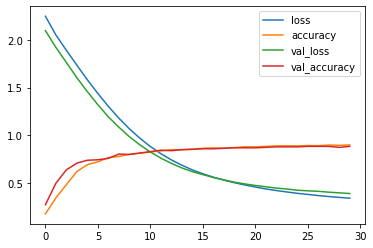

In [ ]:
#plot the loss
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
loss, acc = model.evaluate(x_test, y_test,verbose=0)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))


Testing loss: 0.36, acc: 0.90%


In [ ]:
loss, acc = model.evaluate(x_train, y_train)
print('\nTraining loss: %.2f, acc: %.2f%%'%(loss, acc))

32/32 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.9030

Training loss: 0.34, acc: 0.90%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)
print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted:
[7 2 3 8 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 2 5 5 8 9 2 5
 9 4 8 8 4 2 2 1 2 7 9 0 3 7 2 7 5 7 9 8 2 9 8 8 6 6 6 7 6 2 4 2 4 1 5 9 1
 8 4 0 5 6 2 4 3 2 7 7 7 7 0 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 4 1 8 2 2 3 5 2 9 3 8 2
 7 0 9 9 0 7 6 2 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 3 5 7 4 1 3 3 1
 1 3 3 8 9 6 7 7 2 3 0 1 4 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 

In [ ]:
test_predictions=model.predict(x_test)
test_predictions

array([[4.41397959e-03, 1.10788736e-03, 2.99208169e-03, ...,
        9.74595547e-01, 1.32754903e-05, 5.40197128e-04],
       [1.84744145e-04, 9.60488280e-04, 5.88335097e-01, ...,
        6.61914237e-03, 1.38032861e-04, 9.16646386e-05],
       [1.48492400e-03, 8.18574161e-04, 1.89404249e-01, ...,
        2.43991390e-02, 2.37093016e-04, 2.10498064e-03],
       ...,
       [2.84075260e-01, 3.93579565e-02, 1.05643049e-02, ...,
        6.72146901e-02, 6.01083832e-03, 8.20599273e-02],
       [1.06787782e-04, 7.53708463e-03, 1.93503656e-04, ...,
        1.19968936e-04, 1.19943183e-03, 9.24253285e-01],
       [8.69362208e-04, 3.61622115e-05, 2.11749284e-06, ...,
        5.83028523e-05, 9.73353104e-04, 4.66572747e-05]], dtype=float32)

In [ ]:
predicted_classes1 =pd.Series(predicted_classes .reshape(200,))
predicted_classes1

0      7
1      2
2      3
3      8
4      5
      ..
195    0
196    1
197    4
198    9
199    5
Length: 200, dtype: int64

In [ ]:
pred_df=pd.DataFrame(y_test_original)
pred_df=pd.concat([pred_df,predicted_classes1],axis=1)
pred_df.columns=['Test True Y','Model Predictions']
pred_df

,Test True Y,Model Predictions
0,7,7
1,2,2
2,3,3
3,1,8
4,5,5
...,...,...
195,0,0
196,1,1
197,4,4
198,9,9


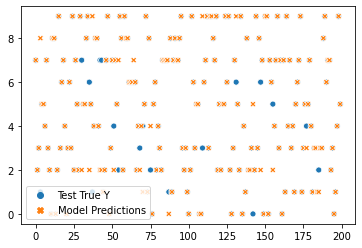

In [ ]:
import seaborn as sns
sns.scatterplot(data=pred_df)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد کامل، از ابتدا تا انتها</div>



In [ ]:
# 1. Import libraries and modules
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from dataset import load_hoda

np.random.seed(123)  # for reproducibility

# 2. Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

# 3. Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# 7. Fit model on training data
model.fit(x_train, y_train,
          epochs=30,
          batch_size=64)

# 8. Evaluate model on test data
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>